In [5]:
import pandas as pd
import os

# 2016년도 지하철 탑승인원 데이터
## 질문 
1. 2016에서 승차가 가장 많은 역 Top 5
2. 서울역에서 가장 이동인구가 많은 시간대(승차,하차)

In [7]:
# Subway_data 폴더에 있는 데이터를 모두 확인하기
os.listdir('./Subway_data')  

['Subway_201601.csv',
 'Subway_201602.csv',
 'Subway_201603.csv',
 'Subway_201604.csv',
 'Subway_201605.csv',
 'Subway_201606.csv',
 'Subway_201607.csv',
 'Subway_201608.csv',
 'Subway_201609.csv',
 'Subway_201610.csv',
 'Subway_201611.csv',
 'Subway_201612.csv']

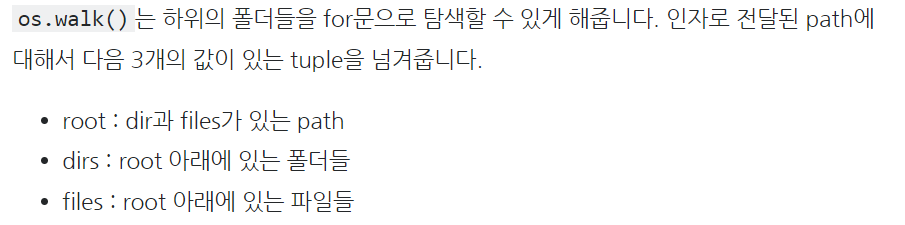

In [37]:
for roots, dirs, files in os.walk('./Subway_data/'): 
    for file in files : 
        print(f'{roots}{file}') # f'{a}' = {}.format(a)

./Subway_data/Subway_201601.csv
./Subway_data/Subway_201602.csv
./Subway_data/Subway_201603.csv
./Subway_data/Subway_201604.csv
./Subway_data/Subway_201605.csv
./Subway_data/Subway_201606.csv
./Subway_data/Subway_201607.csv
./Subway_data/Subway_201608.csv
./Subway_data/Subway_201609.csv
./Subway_data/Subway_201610.csv
./Subway_data/Subway_201611.csv
./Subway_data/Subway_201612.csv


### 데이터 받아오기 

In [38]:
total = []
for roots, dirs, files in os.walk('./Subway_data/'): 
    for i, file in enumerate(files) : 
        total.append(pd.read_csv(f'{roots}{file}',encoding='euc-kr'))
total

[               날짜   호선        역명 구 분   할인  04 ~ 05  05 ~ 06  06 ~ 07  07 ~ 08  \
 0      2016-01-01  1호선  서울역(150)  승차   일반       44      298      243      490   
 1      2016-01-01  1호선  서울역(150)  승차  초등생        1        4        0        4   
 2      2016-01-01  1호선  서울역(150)  승차  청소년        8       33       15       16   
 3      2016-01-01  1호선  서울역(150)  승차  대학생        0        0        0        0   
 4      2016-01-01  1호선  서울역(150)  승차   우대       11       70       78       65   
 ...           ...  ...       ...  ..  ...      ...      ...      ...      ...   
 52665  2016-01-31  4호선  남태령(434)  승차   우대        0        5        7        4   
 52666  2016-01-31  4호선  남태령(434)  하차   일반        0        0        4        9   
 52667  2016-01-31  4호선  남태령(434)  하차  초등생        0        0        0        0   
 52668  2016-01-31  4호선  남태령(434)  하차  청소년        0        0        0        0   
 52669  2016-01-31  4호선  남태령(434)  하차   우대        0        0        7        7   
 
        08 ~ 0

### 컬럼 통일하기

In [39]:
for i, df in enumerate(total):
    print(i, df.columns)
    
# 0~4 까지, 5~11(시제외)까지

0 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
1 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
2 Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01'

In [46]:
#1~5
#6~12

a = ['날짜', '호선', '역명', '구분', '할인', '04 ~ 05', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02', '02 ~ 03', '03 ~ 04']

b = ['역명', '날짜', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02']

for i in total[:5] :
    i.columns = a
    
for i in total[5:] :
    i.columns = b

In [47]:
for i, df in enumerate(total):
    print(i, df.columns)

0 Index(['날짜', '호선', '역명', '구분', '할인', '04 ~ 05', '05~06', '06~07', '07~08',
       '08~09', '09~10', '10~11', '11~12', '12~13', '13~14', '14~15', '15~16',
       '16~17', '17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24',
       '00~01', '01~02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
1 Index(['날짜', '호선', '역명', '구분', '할인', '04 ~ 05', '05~06', '06~07', '07~08',
       '08~09', '09~10', '10~11', '11~12', '12~13', '13~14', '14~15', '15~16',
       '16~17', '17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24',
       '00~01', '01~02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
2 Index(['날짜', '호선', '역명', '구분', '할인', '04 ~ 05', '05~06', '06~07', '07~08',
       '08~09', '09~10', '10~11', '11~12', '12~13', '13~14', '14~15', '15~16',
       '16~17', '17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24',
       '00~01', '01~02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
3 Index(['날짜', '호선', '역명', '구분', '할인', '04 ~ 05', '05~06', '06~07', '07~08',
       '

In [48]:
df1 = pd.concat([x for x in total[0:5]])
df2 = pd.concat([x for x in total[5:]])

In [49]:
df1

,날짜,호선,역명,구분,할인,04 ~ 05,05~06,06~07,07~08,08~09,...,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,02 ~ 03,03 ~ 04
0,2016-01-01,1호선,서울역(150),승차,일반,44,298,243,490,909,...,2520,2129,1924,2038,1766,868,52,0,0,0
1,2016-01-01,1호선,서울역(150),승차,초등생,1,4,0,4,18,...,70,38,37,45,32,6,0,0,0,0
2,2016-01-01,1호선,서울역(150),승차,청소년,8,33,15,16,54,...,139,106,111,128,89,44,1,0,0,0
3,2016-01-01,1호선,서울역(150),승차,대학생,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,1호선,서울역(150),승차,우대,11,70,78,65,151,...,284,219,168,138,138,50,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52981,2016-05-31,4호선,남태령(434),승차,우대,0,9,11,10,24,...,21,5,6,4,0,0,0,0,0,0
52982,2016-05-31,4호선,남태령(434),하차,일반,0,0,78,106,165,...,43,41,31,35,21,18,11,0,0,0
52983,2016-05-31,4호선,남태령(434),하차,초등생,0,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0
52984,2016-05-31,4호선,남태령(434),하차,청소년,0,0,1,149,42,...,2,4,1,0,3,1,0,0,0,0


In [52]:
df1.drop(['호선', '할인', '04 ~ 05','02 ~ 03', '03 ~ 04'],axis =1,inplace = True)

In [53]:
df1

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,서울역(150),승차,298,243,490,909,1347,1618,2399,...,2871,2550,2520,2129,1924,2038,1766,868,52,0
1,2016-01-01,서울역(150),승차,4,0,4,18,60,57,86,...,90,65,70,38,37,45,32,6,0,0
2,2016-01-01,서울역(150),승차,33,15,16,54,89,94,136,...,147,152,139,106,111,128,89,44,1,0
3,2016-01-01,서울역(150),승차,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-01,서울역(150),승차,70,78,65,151,207,277,308,...,378,344,284,219,168,138,138,50,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52981,2016-05-31,남태령(434),승차,9,11,10,24,40,21,18,...,11,26,21,5,6,4,0,0,0,0
52982,2016-05-31,남태령(434),하차,0,78,106,165,47,16,24,...,28,32,43,41,31,35,21,18,11,0
52983,2016-05-31,남태령(434),하차,0,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52984,2016-05-31,남태령(434),하차,0,1,149,42,1,2,0,...,3,1,2,4,1,0,3,1,0,0


In [54]:
subway = pd.concat([df1,df2])

### 역명의 ()부분 삭제 

In [55]:
subway['역명'] = subway['역명'].apply(lambda x : x[:-5])

In [56]:
set(subway['역명'])

{'가락시장',
 '강남',
 '강변',
 '건대입구',
 '경복궁',
 '경찰병원',
 '고속터미널',
 '교대',
 '구로디지털단지',
 '구의',
 '구파발',
 '금호',
 '길음',
 '낙성대',
 '남부터미널',
 '남태령',
 '노원',
 '녹번',
 '당고개',
 '당산',
 '대림',
 '대청',
 '대치',
 '도곡',
 '도림천',
 '독립문',
 '동대문',
 '동대문역사문화공원',
 '동대입구',
 '동묘앞',
 '동작',
 '뚝섬',
 '매봉',
 '명동',
 '무악재',
 '문래',
 '미아',
 '미아사거리',
 '방배',
 '봉천',
 '불광',
 '사당',
 '삼각지',
 '삼성',
 '상계',
 '상왕십리',
 '서울대입구',
 '서울역',
 '서초',
 '선릉',
 '성수',
 '성신여대입구',
 '수서',
 '수유(강북구청)',
 '숙대입구',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신사',
 '신설동',
 '신용산',
 '신정네거리',
 '신천',
 '신촌',
 '쌍문',
 '아현',
 '안국',
 '압구정',
 '약수',
 '양재',
 '양천구청',
 '역삼',
 '연신내',
 '영등포구청',
 '오금',
 '옥수',
 '왕십리(성동구청)',
 '용답',
 '용두',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '이촌',
 '일원',
 '잠실',
 '잠실나루',
 '잠원',
 '제기동',
 '종각',
 '종로3가',
 '종로5가',
 '종합운동장',
 '지축',
 '창동',
 '청량리(지하)',
 '총신대입구',
 '충무로',
 '충정로',
 '학여울',
 '한성대입구',
 '한양대',
 '합정',
 '혜화',
 '홍대입구',
 '홍제',
 '회현'}

## 2016년 가장 승차가 많은 역 5곳 구하기

In [57]:
group_s = subway.groupby(['역명','구분'],as_index=False).sum()

In [58]:
group_s = (subway[subway['구분'] == '승차'].groupby(['역명'],as_index=True)).sum()

In [59]:
((group_s.sum(axis=1)).sort_values(ascending=False))[0:5]

역명
강남      36262673
잠실      31080170
홍대입구    28015621
사당      27432213
서울역     27316668
dtype: int64

In [60]:
# 2016년 가장 승차가 많은 역 5곳
((group_s.sum(axis=1)).sort_values(ascending=False))[0:5].index

Index(['강남', '잠실', '홍대입구', '사당', '서울역'], dtype='object', name='역명')

## 서울역의 승하차가 가장 많은 시간대 구하기

In [62]:
group_ss = subway.groupby(['역명','구분'],as_index=False).sum()

In [63]:
# 승차
x = group_ss[(group_ss['역명'] =='서울역') & (group_ss['구분'] =='승차')].max()
(x[2:]).sort_values(ascending=False)

18~19    3669662
19~20    2184970
17~18    2171584
16~17    1808772
15~16    1770907
21~22    1639702
12~13    1565833
20~21    1546375
13~14    1517971
11~12    1389296
14~15    1296633
08~09    1294078
22~23    1292160
09~10    1118942
10~11    1094949
07~08     738023
23~24     629933
06~07     273928
05~06     229955
00~01      82155
01~02        840
dtype: object

In [64]:
# 승차가 가장 많은 시간대
((x[2:]).sort_values(ascending=False).index)[0]

'18~19'

In [65]:
# 하차
x = group_ss[(group_ss['역명'] =='서울역') & (group_ss['구분'] =='하차')].max()
(x[2:]).sort_values(ascending=False)

08~09    4021411
09~10    2085452
18~19    1966875
07~08    1940761
17~18    1744722
16~17    1692105
15~16    1599141
19~20    1497894
14~15    1488336
13~14    1465612
10~11    1400949
12~13    1380646
11~12    1265588
20~21    1090528
21~22    1005063
22~23     898156
06~07     818312
23~24     488045
00~01     180384
05~06     118078
01~02      16785
dtype: object

In [66]:
# 하차가 가장 많은 시간대
((x[2:]).sort_values(ascending=False).index)[0]

'08~09'